In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,precision_recall_curve,confusion_matrix,f1_score

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.drop(['User ID'],axis=1,inplace=True)

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


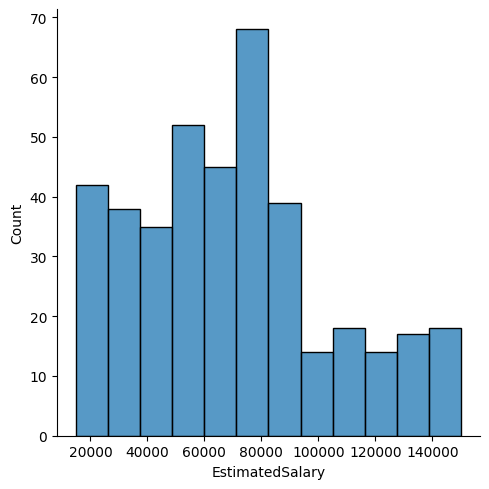

In [7]:
sns.displot(df['EstimatedSalary'])

In [8]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

<Axes: >

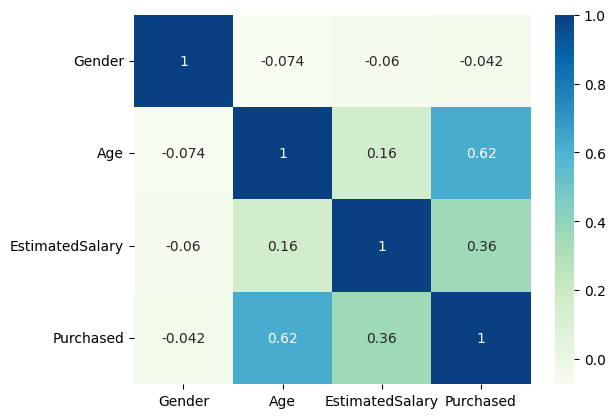

In [10]:
df.corr()
sns.heatmap(df.corr(),cmap='GnBu',annot=True)

From the correlation matrix, we see that Gender is not correlated to other attributes so we can drop that too.

In [11]:
df.drop(['Gender'],axis=1,inplace=True)

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
scalar = StandardScaler()


In [28]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [18]:
x = scalar.fit_transform(x)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = True)


In [21]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [22]:
y_pred = classifier.predict(X_test)


In [23]:
accuracy_score(y_test, y_pred)


0.86

In [24]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



<Axes: >

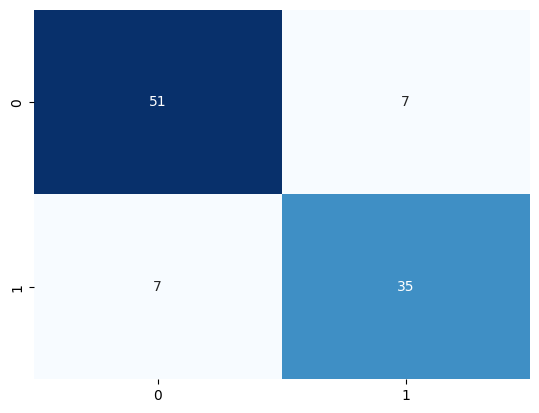

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

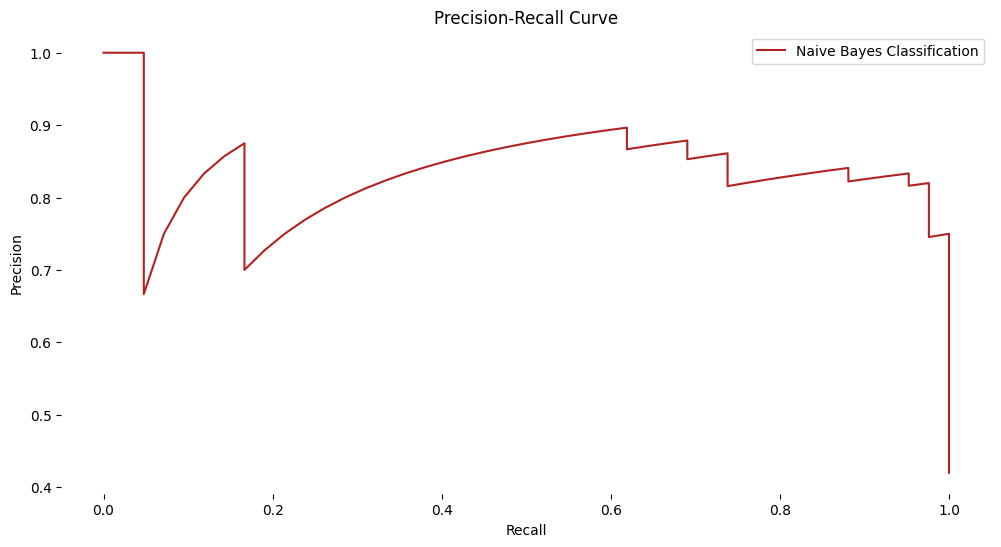

In [27]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend()